In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import phaseportrait as pp
import sys
import math
from typing import *

# Qns 1
By generating graphs according to the Erdos-Renyi (N, p) algorithm and considering the asymptotic behaviour of the giant connected component as N ! 1, reproduce the following figure:

graph number: 0 / nodes: 250
graph number: 1 / nodes: 250
graph number: 2 / nodes: 250
graph number: 3 / nodes: 250
graph number: 4 / nodes: 250
graph number: 5 / nodes: 250
graph number: 6 / nodes: 250
graph number: 7 / nodes: 250
graph number: 8 / nodes: 250
graph number: 9 / nodes: 250
graph number: 10 / nodes: 250
graph number: 11 / nodes: 250
graph number: 12 / nodes: 250
graph number: 13 / nodes: 250
graph number: 14 / nodes: 250
graph number: 15 / nodes: 250
graph number: 16 / nodes: 250
graph number: 17 / nodes: 250
graph number: 18 / nodes: 250
graph number: 19 / nodes: 250
graph number: 20 / nodes: 250
graph number: 21 / nodes: 250
graph number: 22 / nodes: 250
graph number: 23 / nodes: 250
graph number: 24 / nodes: 250
graph number: 25 / nodes: 250
graph number: 26 / nodes: 250
graph number: 27 / nodes: 250
graph number: 28 / nodes: 250
graph number: 29 / nodes: 250
graph number: 30 / nodes: 250
graph number: 31 / nodes: 250
graph number: 32 / nodes: 250
graph number: 33 / n

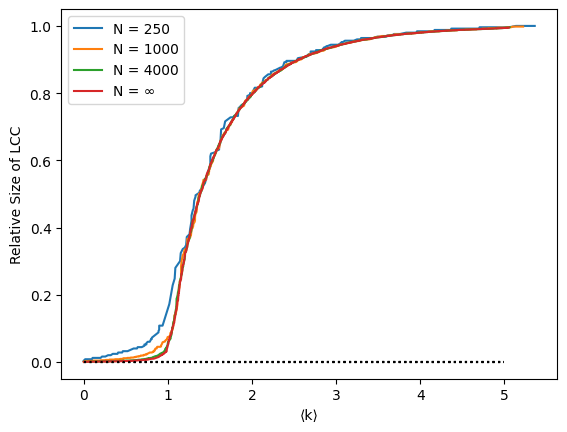

In [14]:
def qns1(nodes: int, degree: int) -> Tuple[float]:
    # LCC grows with ⟨k⟩ = p (N − 1).
    p = degree / (nodes - 1)
    x, y, points = [], [], np.linspace(0, p, nodes)
    sys.stdout.flush()
    for i, ele in enumerate(points):
        print(f"graph number: {i} / nodes: {nodes}", end="\r")
        sys.stdout.flush()
        G = nx.erdos_renyi_graph(nodes, ele)
        # average degree of the graph
        x.append(np.mean(list(dict(G.degree()).values())))

        # size of the maximum connected component relative to the whole graph
        y.append(len(max(nx.connected_components(G), key=len)) / nodes)
    x.sort()
    y.sort()
    return (x, y)

# form the range of nodes
DEGREE = 5
MAX_INF = 6000
NODE_RANGE = [250, 1000, 4000, MAX_INF]
for nodes in NODE_RANGE:
    x, y = qns1(nodes, DEGREE)
    plt.plot(x, y, label=f"N = {nodes if nodes < MAX_INF else '∞'}")
    plt.legend()
    plt.ylabel("Relative Size of LCC")
    plt.hlines(0, 0, 5, colors='black', linestyles='dotted')
    plt.xlabel("⟨k⟩")

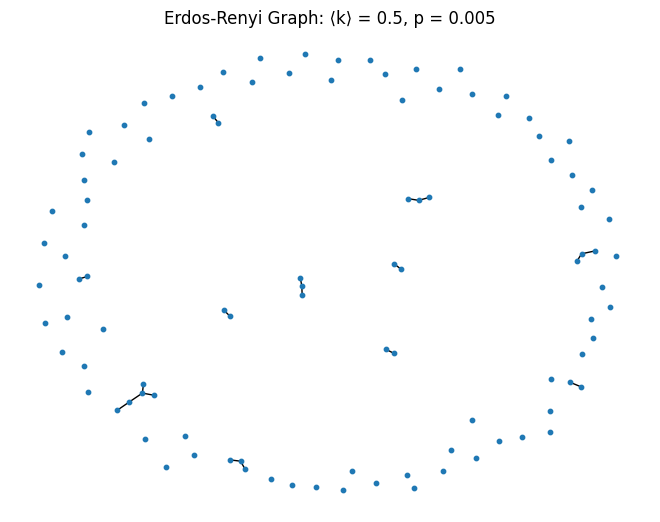

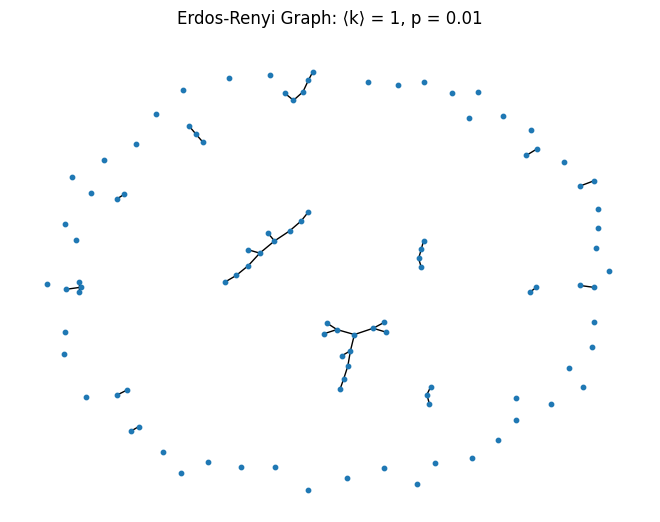

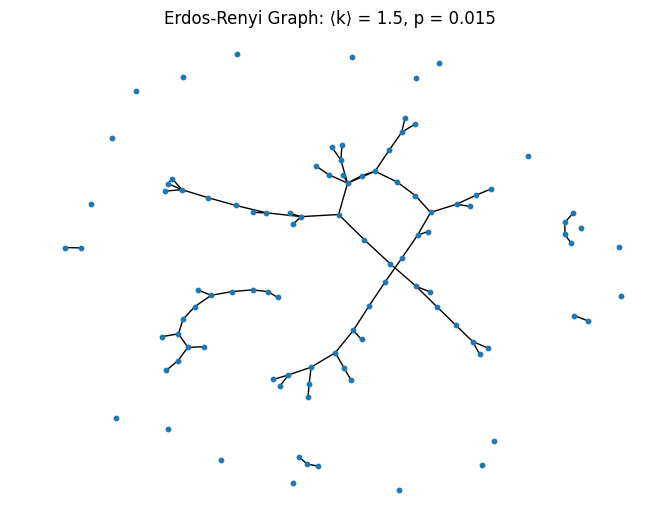

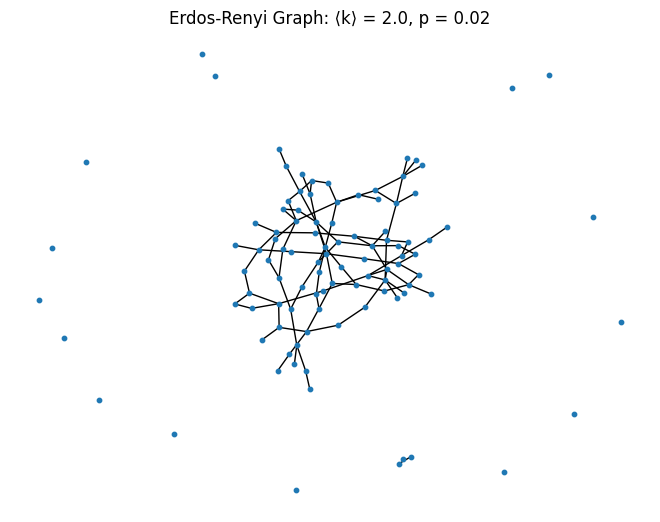

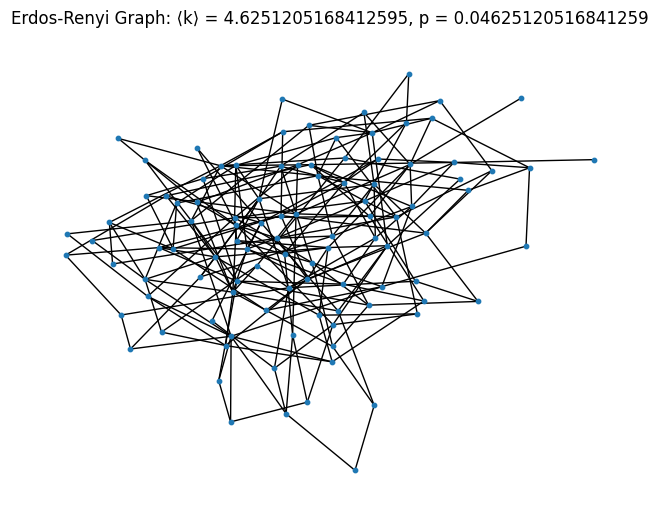

In [ ]:
NODES = 101
RANGE_OF_K = [0.5, 1, 1.5, 2.0, math.log(NODES) + 0.01]

def probability_LCC(n: int, k: float) -> float:
    return k / (n - 1)

for _, k in enumerate(RANGE_OF_K):
    G = nx.erdos_renyi_graph(NODES, probability_LCC(NODES, k))
    nx.draw(G, node_size=10)
    plt.title(f"Erdos-Renyi Graph: ⟨k⟩ = {k}, p = {probability_LCC(NODES, k)}")
    plt.show()

# Qns 2a)
By generating graphs according to Watts and Strogatz' small-world algorithm, reproduce the following figure:

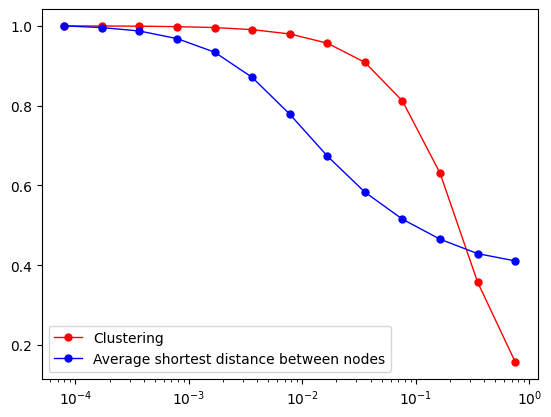

In [15]:
class Graph:
    """
    A Regular Graph that can be randomized according to Watts-Strogatz model

    @nodes: number of nodes in the graph
    @edges: list of edges in the graph
    @Graph: networkx graph
    @all_possible_edges: list of all possible edges in the graph
    """
    def __init__(self, nodes: int, edges: List[Tuple[int, int]]):
        self.nodes = nodes
        self.edges = edges
        self.Graph = nx.Graph()
        self.Graph.add_nodes_from(range(nodes))
        self.Graph.add_edges_from(edges)

        self.all_possible_edges = []
        for i in range(nodes):
            for j in range(i):
                self.all_possible_edges.append((i, j))
        
    """
    Swap an edge with a probability of p

    @param p: probability of swapping an edge
    @return: a new graph with the edges swapped randomly
    """
    def randomize_graph(self, p: float) -> nx.Graph:
        new_edges = list(self.edges)
        for i in range(len(self.edges)):
            if rand.random() < p:
                new_edge = self.all_possible_edges[rand.randint(0, len(self.all_possible_edges) - 1)]
        
                # remove duplicates
                while new_edge in new_edges:
                    new_edge = self.all_possible_edges[rand.randint(0, len(self.all_possible_edges) - 1)]
                new_edges[i] = new_edge
        return Graph(self.nodes, new_edges)

    """
    Graph where nodes are connected by edges using degree of separation

    @param nodes: number of nodes
    @param separation: Degree of separation between nodes
    @return: a graph with nodes connected by edges using degree of separation
    """
    @staticmethod
    def make_graph(nodes: int, separation: int) -> nx.Graph:
        edges = []
        for i in range(nodes):
            for j in range(i - separation, i):
                if j < 0:
                    edges.append((i, j + nodes))
                else:
                    edges.append((i, j))
                    
        return Graph(nodes, edges)

# initialize 100 graphs, so as to have lower statistical error, multiply by 100
NUMBER_OF_POINTS = 100
DOMAIN = list(map(lambda x : 1.1 ** (x - 99), range(NUMBER_OF_POINTS)))


def graph_plotter(clustering_coeffs: List[float], avg_shortest_paths: List[float], domain: List[float]) -> None:

    # when p -> 0
    clustering_coeffs = list(map(lambda x : x / clustering_coeffs[0], clustering_coeffs))
    avg_shortest_paths = list(map(lambda x : x / avg_shortest_paths[0], avg_shortest_paths))

    plt.semilogx(domain[::8], clustering_coeffs[::8], color = 'red', marker = 'o', linewidth = 1, markersize = 5, label='Clustering')
    plt.semilogx(domain[::8], avg_shortest_paths[::8], color = 'blue', marker = 'o', linewidth = 1, markersize = 5, label='Average shortest distance between nodes')
    plt.legend()
    plt.show()

def qns2(datapoints: int, number_of_graphs: int) -> None:
    clustering_coeffs, avg_shortest_paths = [], []
    graphs = [ Graph.make_graph(100, 5) ] * number_of_graphs
    for i in range(datapoints):
        sys.stdout.flush()
        connected_component_sum, shortest_path_sum = 0, 0

        for g in graphs:
            print(f"graph number: {i + 1}, {number_of_graphs}", end='\r')
            sys.stdout.flush()
            watts_and_strogatz_graph = g.randomize_graph(DOMAIN[i])
            G = getattr(watts_and_strogatz_graph, 'Graph')
            for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
                shortest_path_sum += nx.average_shortest_path_length(C)
            connected_component_sum += nx.average_clustering(G)
        clustering_coeffs.append(connected_component_sum / len(graphs))
        avg_shortest_paths.append(shortest_path_sum / len(graphs))
    graph_plotter(clustering_coeffs, avg_shortest_paths, DOMAIN)

qns2(NUMBER_OF_POINTS, 21000)


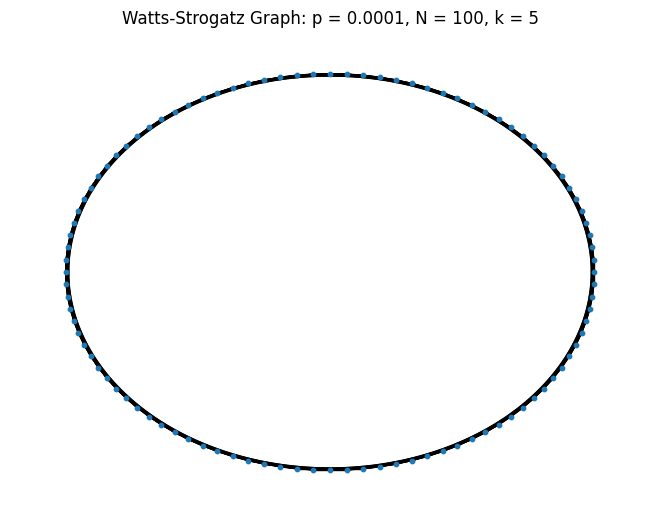

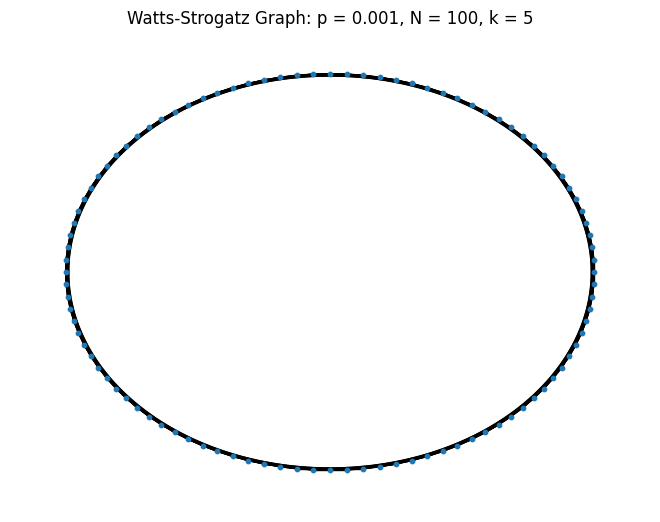

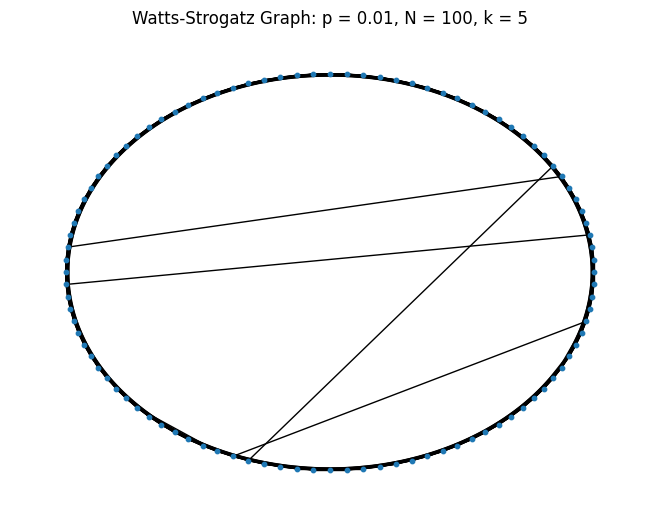

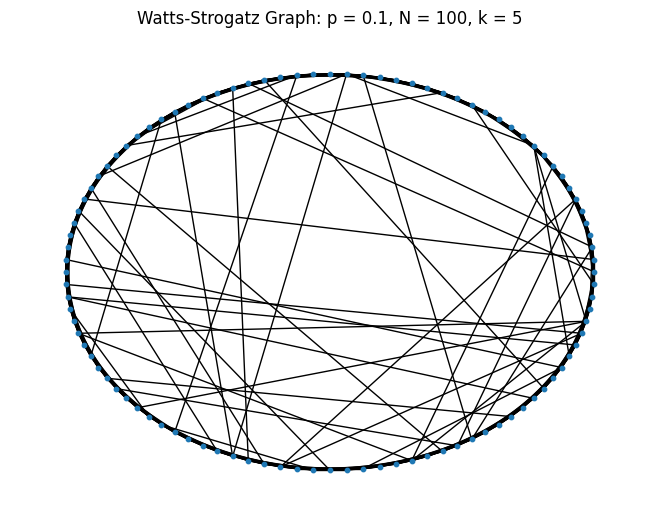

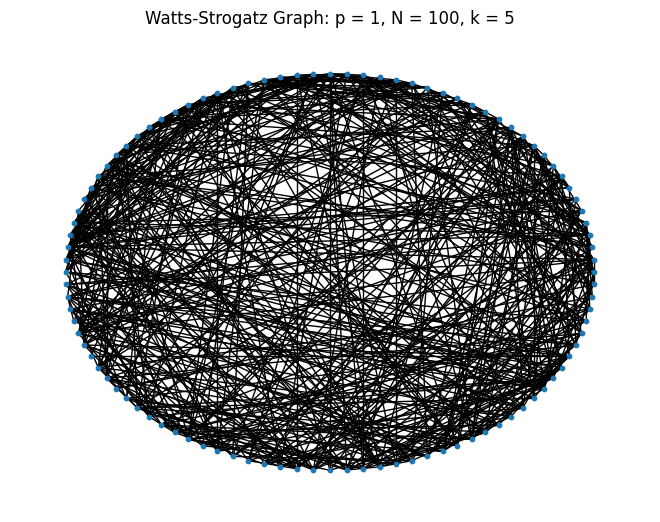

In [ ]:
# Watts and Strogatz Model with different probabilities rewiring p
graphs = [ Graph.make_graph(100, 5) ] * 5
probabilities = [10**-4, 10**-3, 10**-2, 10**-1, 10**0]
def watts_and_strogatz_demo(graphs: List[nx.Graph], probabilities: List[float]) -> None:
    for i, p in enumerate(probabilities):
        G = getattr(graphs[i].randomize_graph(p), "Graph")
        nx.draw(G, pos=nx.circular_layout(G), node_size=10)
        plt.title(f"Watts-Strogatz Graph: p = {p}, N = 100, k = 5")
        plt.show()

watts_and_strogatz_demo(graphs, probabilities)

# Qns 3)

Consider the coupled Fitzhugh-Nagumo model (FHM)

$$
\epsilon \dot{u_{i}} = u_{i} - \frac{u_{i}^{3}}{3} - v_{i} + C_{i} \sum_{j = 1}^n A_{ij} (u_{j} - u_{i}) \\ 
\dot{v_{i}} = u_{i} + a
$$

which acts as a simple 2D model of neuron activation.

b) Draw a phase portrait, including the fixed point and the $u_i$ and $v_i$ nullclines.
(Use the value $\epsilon$ = 0:05 for the rest of the question.)

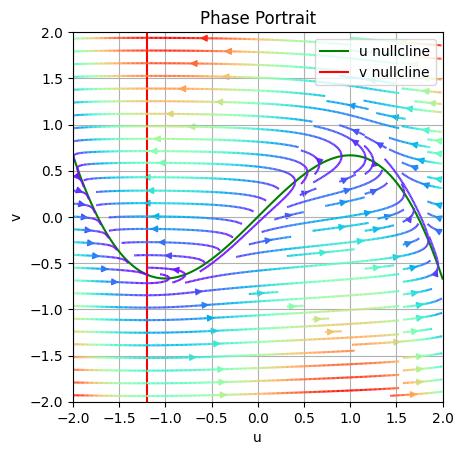

In [ ]:
def qns3b(u: int, v: int) -> None:
    def f(u, v) -> Tuple[float, float]:
        return ((u - (u**3) / 3 - v) / 0.05, u + 1.2)
    fig = pp.PhasePortrait2D(f, (-2, 2), xlabel='u', ylabel='v')
    plt.plot(u, v, 'g', label="u nullcline")
    plt.axvline(x=-1.2, color='r', label="v nullcline")
    plt.legend(loc='upper right')
    fig.plot()
u = np.linspace(-2, 2, 100)
v = u - u**3 / 3
qns3b(u, v)

c) For $\epsilon$ = 0:05, simulate the FHM and plot

1) The system converging to the fixed point. 
2) The periodic solution before it blows up into a Canard.
3) The Canard periodic solution.

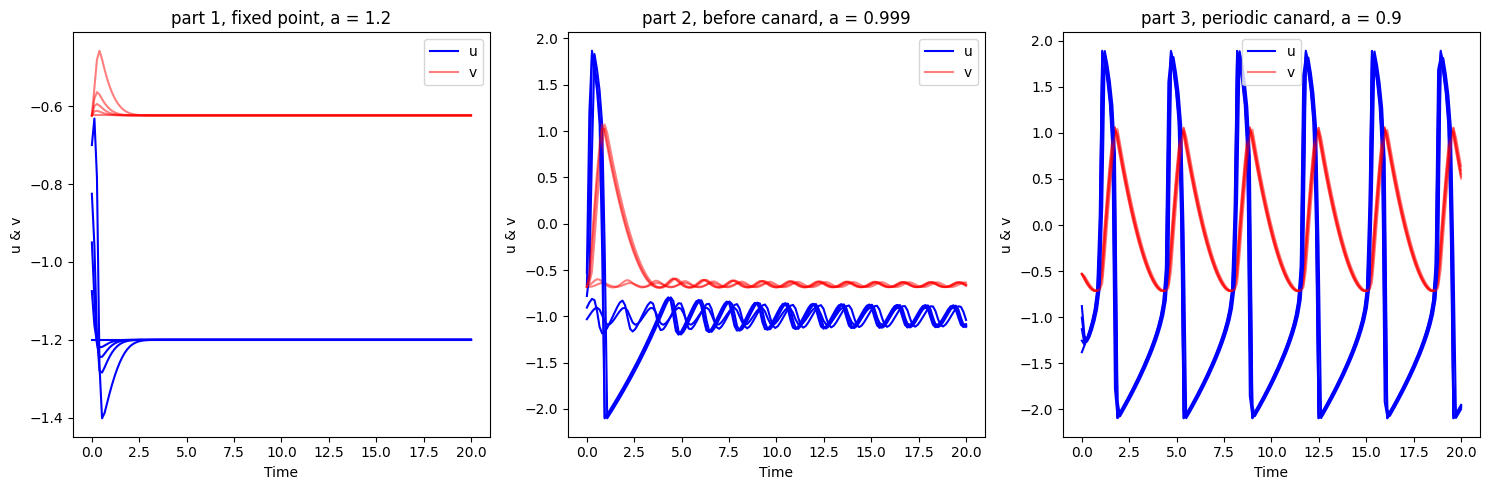

In [34]:
import scipy.integrate as intg
import numpy as np
from functools import partial
from typing import *

time = np.linspace(0, 20, 150)

# different phases needs different values
cases = [
    {'a': 1.2},
    {'a': 0.999},
    {'a': 0.90},
]

def displacement(inputs, time=np.linspace(0, 20, 100), num=20, dmax=0.05,):
    # displacement starting from resting point
    trajectory = []
    dis = intg.odeint(partial(fhm, **inputs), y0=[0, 0], t=np.linspace(0, 1000, 1000))[-1]
    for d in np.linspace(0, dmax, num):
        trajectory.append(intg.odeint(partial(fhm, **inputs), y0=dis + np.array([d, 0]), t=time))
    return trajectory

def fhm(x: List[float], t: int, a: int):
    # time derivative of the FHM
    eq1 = (x[0] - x[0]**3 / 3 - x[1]) / 0.05
    eq2 = x[0] + a
    return np.array([eq1, eq2])

def qns3c(cases: List[Dict[str, float]], time: np.ndarray) -> None:
    graph_names = ['fixed point', 'before canard', 'periodic canard']
    traj = dict()
    for i, ele in enumerate(cases):
        traj[i] = displacement(ele, num=5, time=time, dmax=0.5)
        # store all trajectories as it runs 

    # plot the trajectories
    _, ax = plt.subplots(1, len(cases), figsize=(len(cases) * 5, 5))
    for i, ele in enumerate(cases):
        ax[i].set(xlabel='Time', ylabel='u & v', title=f'part {i + 1}, {graph_names[i]}, a = {ele["a"]}')
        for j in range(len(traj[i])):
            u = ax[i].plot(time, traj[i][j][:, 0], color='blue', label='u')
            v = ax[i].plot(time, traj[i][j][:, 1], color='red', label='v', alpha=0.5)

        ax[i].legend([u[0], v[0]], ['u', 'v'])
    plt.tight_layout()

qns3c(cases, time)